# Dunnhumby Dataset

Pursuing a comprehensive approach over a Complex Retail Dataset.

- Data Understanding
- Datasets Quality Verification
- Exploratory Data Analysis
- Answering Business Questions
- Visualizations
- KPI development

## Kaggle Description:

This dataset contains household level transactions over two years from a group of 2,500 households who are frequent shoppers at a retailer. It contains all of each household’s purchases, not just those from a limited number of categories. For certain households, demographic information as well as direct marketing contact history are included.

Due to the number of tables (8) and the overall complexity of The Complete Journey, it is suggested that this database be used in more advanced classroom settings. Further, The Complete Journey would be ideal for academic research as it should enable one to study the effects of direct marketing to customers.

The following are examples of questions that could be submitted to students or considered for academic research:

- How many customers are spending more over time? Less over time? Describe these customers.
- Of those customers who are spending more over time, which categories are growing at a faster rate?
- Of those customers who are spending less over time, with which categories are they becoming less engaged?
- Which demographic factors (e.g. household size, presence of children, income) appear to affect customer spend? -Engagement with certain categories?
- Is there evidence to suggest that direct marketing improves overall engagement?

Source: https://www.kaggle.com/datasets/frtgnn/dunnhumby-the-complete-journey?datasetId=408408&sortBy=voteCount

# How to read this notebook



Appart from the typical technical and methodological sections, the EDA of this notebook follows an order based on the 8 distinct datasets provided. 
Instead of splitting the wrangling and business analysis in different notebooks, it will all developed as cleanse and ordered as posible in this unique notebook.
As it may arise, datasets' inspection, business questions, visualizations and observations will be deployed, respecting the order of the different datasets, which can be seen in the index as grouping titles.
After developing the features and target variables for the machine learning model, a comprehensive unique dataframe will be generated, so as to have in one place all and only needed for our prediction.

# Library Import

In [127]:
import pandas as pd 
import numpy as np 

# Visualizations

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import style
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from seaborn import distplot
from seaborn import boxplot
from seaborn import violinplot
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline

# Warnings

import warnings
warnings.filterwarnings('ignore')

# Data import

In [2]:
df_campaing_dates = pd.read_csv('Data\campaign_desc.csv')
df_campaign_hh = pd.read_csv('Data\campaign_table.csv')
df_causal = pd.read_csv('Data\causal_data.csv')
df_coupons_redempt = pd.read_csv('Data\coupon_redempt.csv')
df_coupons = pd.read_csv('Data\coupon.csv')
df_demographics = pd.read_csv('Data\hh_demographic.csv')
df_product = pd.read_csv('Data\product.csv')
df_transactions = pd.read_csv('Data\Transaction_data.csv')

# Data Understanding

In [3]:
print(
    
    "df1 (campaign_desc) columns are : " , df_campaing_dates.columns, '\n------------------------------------------------------------------------------------\n',
    "df2 (campaign_table)columns are : " , df_campaign_hh.columns, '\n------------------------------------------------------------------------------------\n',
    "df3 (causal_data)columns are : " , df_causal.columns,'\n------------------------------------------------------------------------------------\n',
    "df4 (coupon_redempt)columns are : " , df_coupons_redempt.columns,'\n------------------------------------------------------------------------------------\n',
    "df5 (coupon)columns are : "  , df_coupons.columns,'\n------------------------------------------------------------------------------------\n',
    "df6 (hh_demographic)columns are : " , df_demographics.columns,'\n------------------------------------------------------------------------------------\n',
    "df7 (product)columns are : " , df_product.columns,'\n------------------------------------------------------------------------------------\n',
    "df8 (Transaction_data)columns are : " , df_transactions.columns)


df1 (campaign_desc) columns are :  Index(['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY'], dtype='object') 
------------------------------------------------------------------------------------
 df2 (campaign_table)columns are :  Index(['DESCRIPTION', 'household_key', 'CAMPAIGN'], dtype='object') 
------------------------------------------------------------------------------------
 df3 (causal_data)columns are :  Index(['PRODUCT_ID', 'STORE_ID', 'WEEK_NO', 'display', 'mailer'], dtype='object') 
------------------------------------------------------------------------------------
 df4 (coupon_redempt)columns are :  Index(['household_key', 'DAY', 'COUPON_UPC', 'CAMPAIGN'], dtype='object') 
------------------------------------------------------------------------------------
 df5 (coupon)columns are :  Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object') 
------------------------------------------------------------------------------------
 df6 (hh_demographic)columns are :  Ind

### Observations

Prima Fascie,

- First 5 tables belong to Campaigns and Coupons.
- Number 7 to Products Information. 
- Number 6 & 8 contain Customers + Spending + Demographics Information.

We will adress these last two files first.

In [4]:
# Household demographics Dataframe Inspection

for col in df_demographics.columns:
    print(df_demographics[col].unique())

['65+' '45-54' '25-34' '35-44' '19-24' '55-64']
['A' 'U' 'B']
['35-49K' '50-74K' '25-34K' '75-99K' 'Under 15K' '100-124K' '15-24K'
 '125-149K' '150-174K' '250K+' '175-199K' '200-249K']
['Homeowner' 'Unknown' 'Renter' 'Probable Renter' 'Probable Owner']
['2 Adults No Kids' '2 Adults Kids' 'Single Female' 'Unknown'
 'Single Male' '1 Adult Kids']
['2' '3' '4' '1' '5+']
['None/Unknown' '1' '2' '3+']
[   1    7    8   13   16   17   18   19   20   22   25   27   31   39
   40   42   43   46   48   49   52   55   56   57   58   67   71   74
   77   78   80   85   86   97   98  101  104  105  109  110  113  114
  117  118  119  121  123  127  131  133  134  136  139  149  155  157
  158  159  161  164  165  166  170  178  184  192  193  198  201  208
  209  211  212  214  216  218  219  220  221  222  230  232  235  239
  242  243  248  249  250  253  256  257  263  264  276  281  282  283
  289  290  294  300  301  302  304  306  309  314  317  319  321  324
  325  329  332  334  346  350  3

We may want to change de Marital Status Code to the full meaning, we´r keeping it as text anyway.

Source of interpretation: USA Agency for HealthCare Research and Quality
https://ushik.ahrq.gov/ViewItemDetails?system=sdo&itemKey=133169000

In [5]:
df_demographics['MARITAL_STATUS_CODE'] = df_demographics['MARITAL_STATUS_CODE'].replace(['U','A','B'],["Unmarried","CommonLaw","RegisteredPartner"])


In [6]:
df_demographics.head(5)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,CommonLaw,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,CommonLaw,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,Unmarried,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,Unmarried,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,RegisteredPartner,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [7]:
def EDA(df_demographics):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape (rows, columns):' + '\033[0m')
    print(df_demographics.shape, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Columns :' + '\033[0m')
    print(df_demographics.columns, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatypes & Missing values:' + '\033[0m')
    print(df_demographics.info(), 
          
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df_demographics.columns:
        print('\033[1m' + 'Unique Values in {} :'.format(col) + '\033[0m',len(df_demographics[col].unique()))

    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summarized Statistics :' + '\033[0m')
    print(df_demographics.describe(include='all'), 
          
          '\n------------------------------------------------------------------------------------\n')
    

    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df_demographics.duplicated().sum())
          
EDA(df_demographics)


EXPLORATORY DATA ANALYSIS :

Shape (rows, columns):
(801, 8) 
------------------------------------------------------------------------------------

Columns :
Index(['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC',
       'household_key'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatypes & Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    

In [8]:
# Transactions Dataframe Inspection

df_transactions.head(5)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [9]:
def EDA(df_transactions):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape (rows, columns):' + '\033[0m')
    print(df_transactions.shape, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Columns :' + '\033[0m')
    print(df_transactions.columns, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatypes & Missing values:' + '\033[0m')
    print(df_transactions.info(), 
          
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df_transactions.columns:
        print('\033[1m' + 'Unique Values in {} :'.format(col) + '\033[0m',len(df_transactions[col].unique()))

    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summarized Statistics :' + '\033[0m')
    print(df_transactions.describe(include='all'), 
          
          '\n------------------------------------------------------------------------------------\n')
    

    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df_transactions.duplicated().sum())
          
EDA(df_transactions)

EXPLORATORY DATA ANALYSIS :

Shape (rows, columns):
(2595732, 12) 
------------------------------------------------------------------------------------

Columns :
Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatypes & Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DIS

Good news. We can expect cleansed and ordered data as well for the next files. We will nontheless check later. Lets start working these first files.

# Exploratory Data Analysis (EDA) - Univariate

## Household Demographics

In [10]:
def pie_categorical(df_demographics):

    #function to plot the histogram of categorical variables in pie graph
    features = df_demographics.columns

    #plot pie charts of categorical variables
    fig_pie_cat = plt.figure(figsize=(15,15))
    count = 1

    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_pie_cat.add_subplot(rows,cols,count)
        df_demographics[i].value_counts().plot(kind="pie",autopct="%.1f%%",ax=ax)
        plt.ylabel("")
        plt.title(i,fontweight="bold",fontsize=8)
        count += 1

def hist_numeric(df_demographics):

    #function to plot the histogram of numeric variables
    features = df_demographics.columns
    fig_hists = plt.figure(figsize=(15,15))
    fig_hists.subplots_adjust(hspace=0.5,wspace=0.5)
    count = 1

    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_hists.add_subplot(rows,cols,count)
        df_demographics[i].plot(kind="hist",alpha=.5,bins=25,edgecolor="navy",legend=False,ax=ax)
        ax.set_xlabel("")
        ax.set_title(i,fontweight="bold",fontsize=10)
        count += 1

 

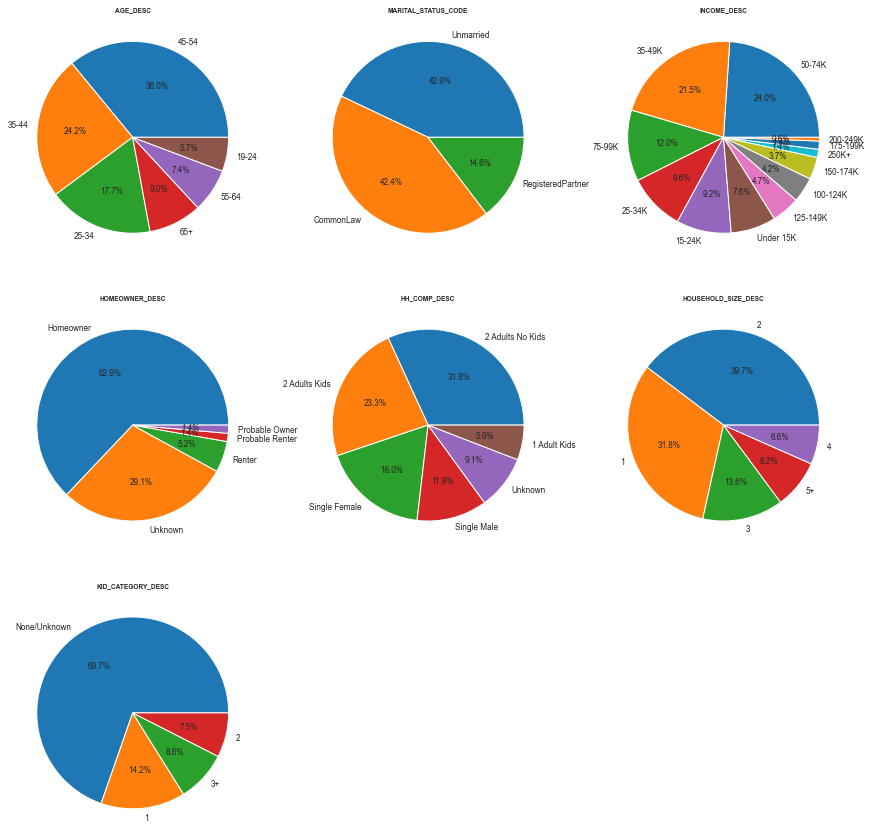

In [11]:
pie_categorical(df_demographics.drop("household_key",axis=1))

### Findings:

- Children: Majority of the customers does not have a child (~70%)
- Household Size: Majority of Households made up of 1 or 2 persons (~70%)
- Age: Majority of the customers age in between 35-54 (~60%)
- Income: Almost half of the population have a yearly salary between $35-74K
- House Ownership: Majority of the customers own a house (63%)


## Transactions

Grouping by Houshold to pull some numbers. This is a highly skewed dataset, which means the values are not centered towards a intuitive mean or meadian. Lets visualize it.

In [12]:
grouped_sum = df_transactions.groupby("household_key").sum()

Sales Values

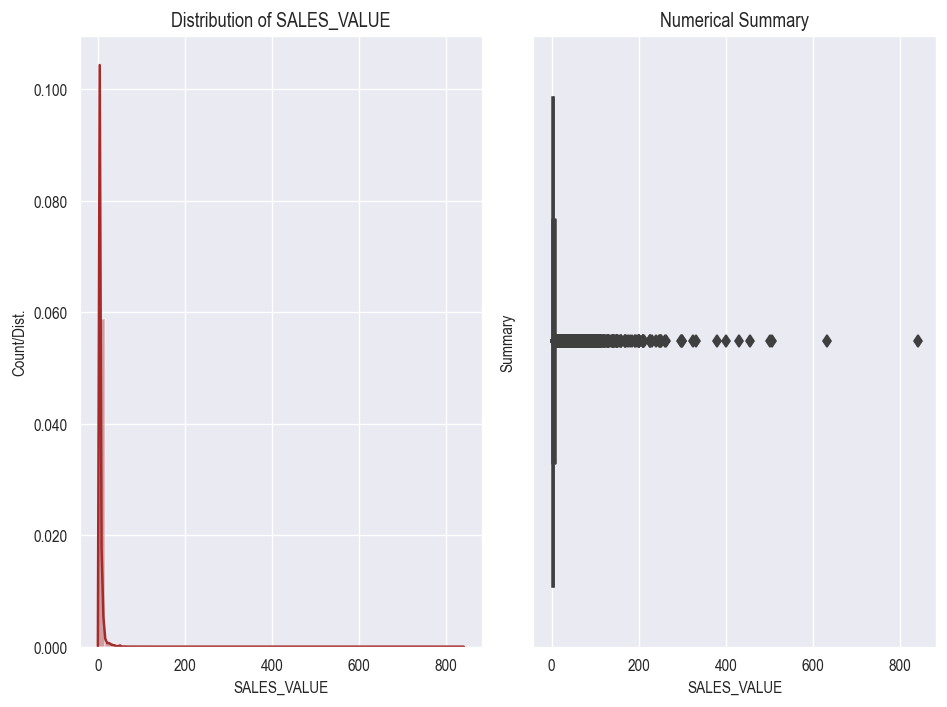

In [121]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,6))

plot0=sns.distplot(df_transactions[df_transactions['SALES_VALUE']!=0]['SALES_VALUE'],ax=axes[0],color='brown')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of SALES_VALUE',fontdict={'fontsize':12})
axes[0].set_xlabel('SALES_VALUE',fontdict={'fontsize':10})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':10})
plt.tight_layout()

plot1=sns.boxplot(df_transactions[df_transactions['SALES_VALUE']!=0]['SALES_VALUE'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':12})
axes[1].set_xlabel('SALES_VALUE',fontdict={'fontsize':10})
axes[1].set_ylabel(r'Summary',fontdict={'fontsize':10})
plt.tight_layout()

Most of the products in the dataset are inexpensive, as the business is probably a supermarket/groceries-retail, although there are some outliers which stand for expensive products. This is why we cant work with tools that need armonic mean-distribution. We will be using the average to pull insights and usefull metrics from de data.

### What is the Average total spent by a household within these two years?

In [13]:

avg_purchase = round(df_transactions.SALES_VALUE.sum()/len(grouped_sum),1)
print("The average Total Spent by Household was: $", avg_purchase)

The average Total Spent by Household was: $ 3223.0


### What is the Average total number of products purchased by a household within two years?

In [14]:
avg_tot_prod = round(grouped_sum["QUANTITY"].mean(),1)
print("The Average total number of products purchased by a household is: " , avg_tot_prod)

The Average total number of products purchased by a household is:  104274.2


### What is the average total number of unique products purchased by a household within two years?

In [15]:
avg_uniq_prod = round(len(df_transactions.groupby(["household_key","PRODUCT_ID"]).sum()["QUANTITY"])/len(grouped_sum),1)
print("The Average total number of unique products purchased by a household is: " , avg_uniq_prod)

The Average total number of unique products purchased by a household is:  560.6


### What is the Average number of store visits per household within two years?

In [16]:
avg_days_visited = round(len(df_transactions.groupby(["household_key","DAY"]).count())/len(grouped_sum),1)
print("The Average number of store visits per household is : " , avg_days_visited)

The Average number of store visits per household is :  90.2


Observation:

- All these measures (besides serving monthly and anually reports) are candidates for building KPIs with real-time stream/batch data flowing to dashboards.
- We will make these same questions with correlation to Time and other variables to pull more insights in the following sections. 

### Top Stores and Customers 

How are the stores performing? Which are our most spending customers?

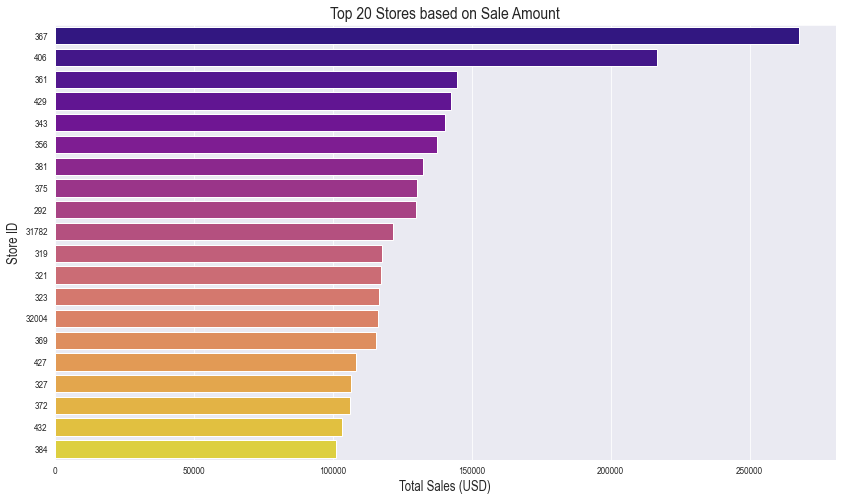

In [120]:
sales_per_store = df_transactions.groupby("STORE_ID").sum()["SALES_VALUE"].sort_values(ascending=False)
sales_per_store = pd.DataFrame(list(zip(sales_per_store.index,sales_per_store)),columns=["Store ID","Total Sales (USD)"])
fig_store = plt.figure(figsize=(14,8))
sns.barplot(y="Store ID",x="Total Sales (USD)",data = sales_per_store[:20],order=sales_per_store[:20]["Store ID"],orient="h", palette = 'plasma')
plt.title('Top 20 Stores based on Sale Amount', fontsize=17)
plt.xlabel('Total Sales (USD)', fontsize=14)
plt.ylabel('Store ID', fontsize=14)
plt.show()

Top 20 customers based on total purchase amount (USD)

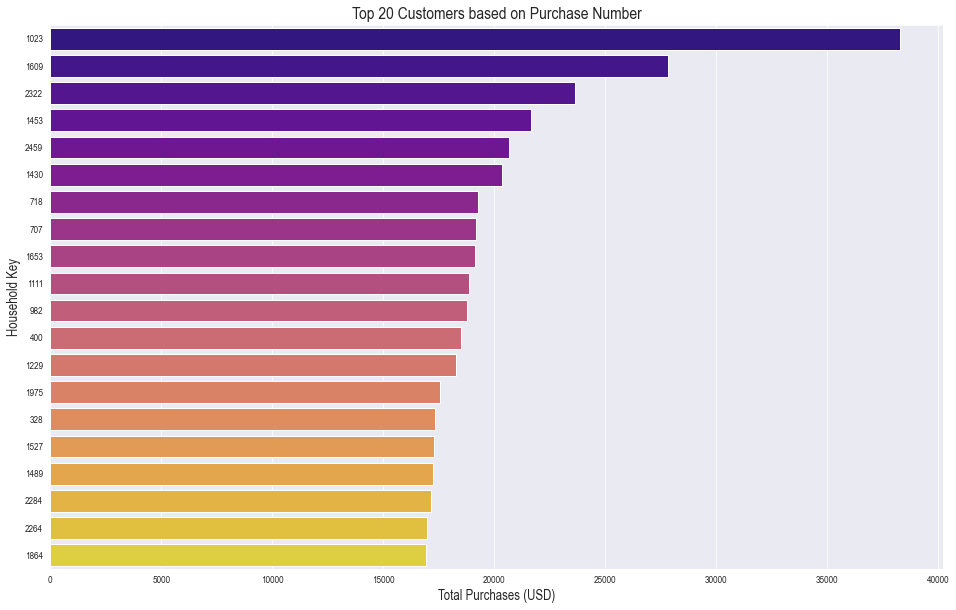

In [119]:
purc_per_cust = df_transactions.groupby("household_key").sum()["SALES_VALUE"].sort_values(ascending=False)
purc_per_cust = pd.DataFrame(list(zip(purc_per_cust.index,purc_per_cust)),columns=["household_key","Total Purchase (USD)"])
fig_store = plt.figure(figsize=(16,10))
sns.barplot(y="household_key",x="Total Purchase (USD)",data = purc_per_cust[:20],order=purc_per_cust[:20]["household_key"],orient="h", palette = 'plasma')
plt.title('Top 20 Customers based on Purchase Number', fontsize=17)
plt.xlabel('Total Purchases (USD)', fontsize=14)
plt.ylabel('Household Key', fontsize=14)
plt.show()

This information could help us to:

- Identify top stores, and with the help of segmentation (location, size), identify as well further variables of top performance (employee motivation,store design), applying thus this elements to other stores to increment profit.
- Identify top customer profile, to
    a) attract more potential customers with these profiles.
    b) keep up business model elements that attract these profiles.
- Reward Top Stores and Top Customers.

## Campaign Types & Duration

Campaign description data is a look up table, containing the start and the end days of each campaign (30 campaigns in total). Also it gives which campaign belongs to what category (Type A, B and C). For the time being, we ignore what Types category means. 

Dataset Quality Check

In [19]:
def EDA(df_campaing_dates):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape (rows, columns):' + '\033[0m')
    print(df_campaing_dates.shape, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Columns :' + '\033[0m')
    print(df_campaing_dates.columns, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatypes & Missing values:' + '\033[0m')
    print(df_campaing_dates.info(), 
          
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df_campaing_dates.columns:
        print('\033[1m' + 'Unique Values in {} :'.format(col) + '\033[0m',len(df_campaing_dates[col].unique()))

    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summarized Statistics :' + '\033[0m')
    print(df_campaing_dates.describe(include='all'), 
          
          '\n------------------------------------------------------------------------------------\n')
    

    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df_campaing_dates.duplicated().sum())
          
EDA(df_campaing_dates)

EXPLORATORY DATA ANALYSIS :

Shape (rows, columns):
(30, 4) 
------------------------------------------------------------------------------------

Columns :
Index(['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY'], dtype='object') 
------------------------------------------------------------------------------------

Datatypes & Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DESCRIPTION  30 non-null     object
 1   CAMPAIGN     30 non-null     int64 
 2   START_DAY    30 non-null     int64 
 3   END_DAY      30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB
None 
------------------------------------------------------------------------------------

Unique Values in DESCRIPTION : 3
Unique Values in CAMPAIGN : 30
Unique Values in START_DAY : 27
Unique Values in END_DAY : 28

------------------------------------

In [20]:
df_campaing_dates.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


Each Campaign Duration

Let's calculate and visualise how long each campaign lasted within two years period

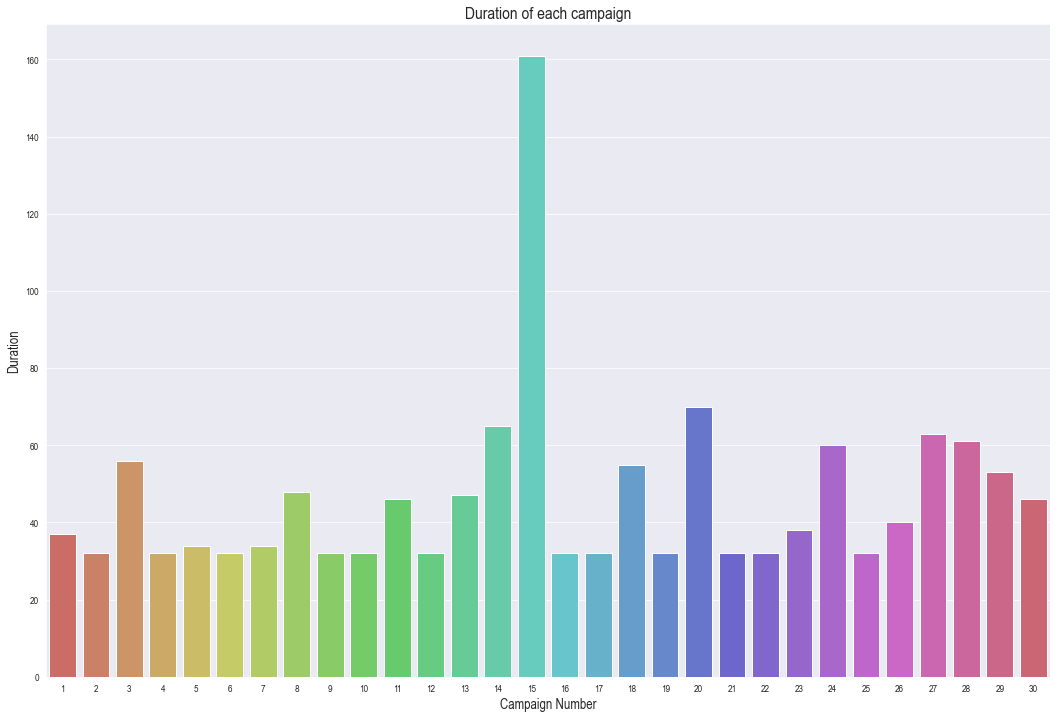

In [118]:
df_campaing_dates["DUR"] = df_campaing_dates.END_DAY-df_campaing_dates.START_DAY
fig = plt.figure(figsize=(18,12))
sns.barplot(x="CAMPAIGN",y="DUR",data=df_campaing_dates,orient="v",
            order=df_campaing_dates.sort_values(by="CAMPAIGN").CAMPAIGN.values, palette = 'hls')
plt.title('Duration of each campaign', fontsize=17)
plt.xlabel('Campaign Number', fontsize=14)
plt.ylabel('Duration', fontsize=14)
plt.show()

Campaign No:15 lasts the longest with a staggering 160 days figure, where other campaigns are fairly close to each other ranging from 30 to 70 days Average campaign duration is 37 days (median)

## Campaigns & Households

Campaign dataset contains identifying information for the marketing campaigns each household participated in.

Dataset Quality Check

In [22]:
def EDA(df_campaign_hh):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape (rows, columns):' + '\033[0m')
    print(df_campaign_hh.shape, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Columns :' + '\033[0m')
    print(df_campaign_hh.columns, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatypes & Missing values:' + '\033[0m')
    print(df_campaign_hh.info(), 
          
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df_campaign_hh.columns:
        print('\033[1m' + 'Unique Values in {} :'.format(col) + '\033[0m',len(df_campaign_hh[col].unique()))

    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summarized Statistics :' + '\033[0m')
    print(df_campaign_hh.describe(include='all'), 
          
          '\n------------------------------------------------------------------------------------\n')
    

    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df_campaign_hh.duplicated().sum())
          
EDA(df_campaign_hh)

EXPLORATORY DATA ANALYSIS :

Shape (rows, columns):
(7208, 3) 
------------------------------------------------------------------------------------

Columns :
Index(['DESCRIPTION', 'household_key', 'CAMPAIGN'], dtype='object') 
------------------------------------------------------------------------------------

Datatypes & Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB
None 
------------------------------------------------------------------------------------

Unique Values in DESCRIPTION : 3
Unique Values in household_key : 1584
Unique Values in CAMPAIGN : 30

------------------------------------------------------------------------------------

Summ

In [23]:
df_campaign_hh.head(5)

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


How many households participated or received a campaign? We know from the dataset description, that there are 2500 households.

In [24]:
print("the number of households that received a campaing are:" , len(df_campaign_hh.household_key.unique()))

the number of households that received a campaing are: 1584


In [25]:
print(round(1584/2500*100) , "% of households received a campaign")

63 % of households received a campaign


To be more specific, lets see Campaings per Households

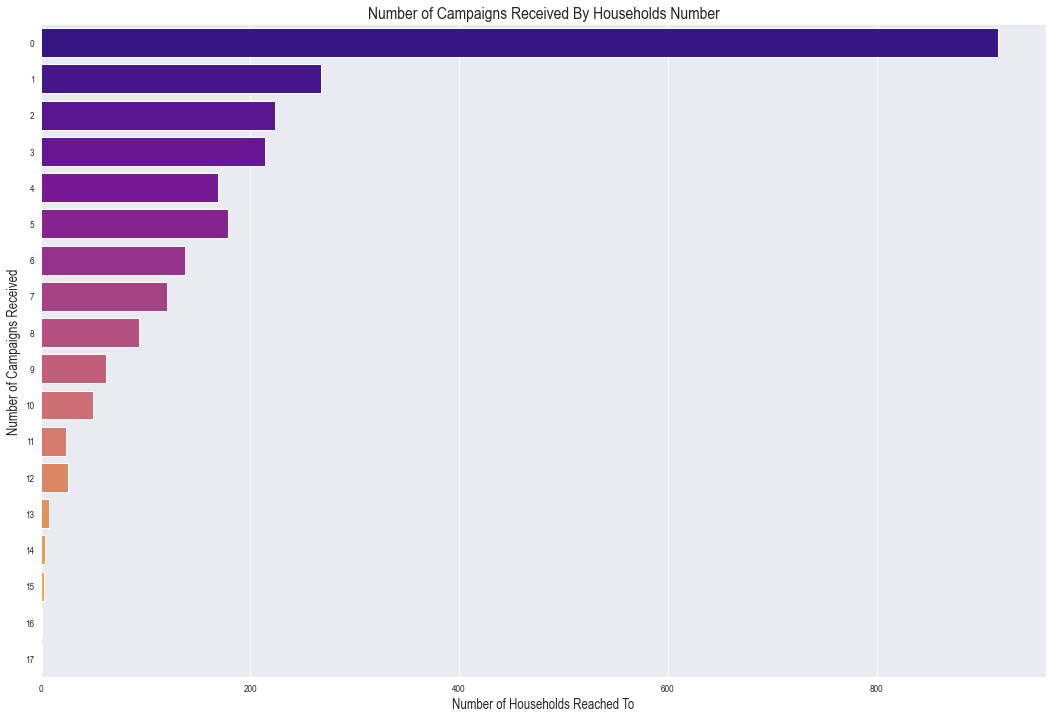

In [117]:
total_households = 2500

no_of_received_campaigns_per_house = df_campaign_hh.household_key.value_counts()
no_of_received_campaigns = no_of_received_campaigns_per_house.value_counts()
no_of_received_campaigns[0] = total_households-len(no_of_received_campaigns_per_house)
no_of_received_campaigns = pd.DataFrame(list(zip(no_of_received_campaigns.index,no_of_received_campaigns))
                                        ,columns=["Number of Campaigns Received",
                                                  "Number of Households Reached To"]).sort_values(
                                                                                            by="Number of Campaigns Received",ascending=True)
plt.figure(figsize=(18,12))
sns.barplot(y="Number of Campaigns Received",x="Number of Households Reached To",data=no_of_received_campaigns,orient="h",
    order=no_of_received_campaigns["Number of Campaigns Received"], palette = 'plasma')
plt.title('Number of Campaigns Received By Households Number', fontsize=17)
plt.xlabel('Number of Households Reached To', fontsize=14)
plt.ylabel('Number of Campaigns Received', fontsize=14)
plt.show()

While 37% of households never received/participated in a campaing (not good), the distribution of number of campaigns through households looks decent. 
Against reasonable business expectations, what we would love to have is actually de opposite (the plot inverted): more campaigns distributed over more households.

Most Frequent Campaigns

Graph below gives the most frequent campaigns. 

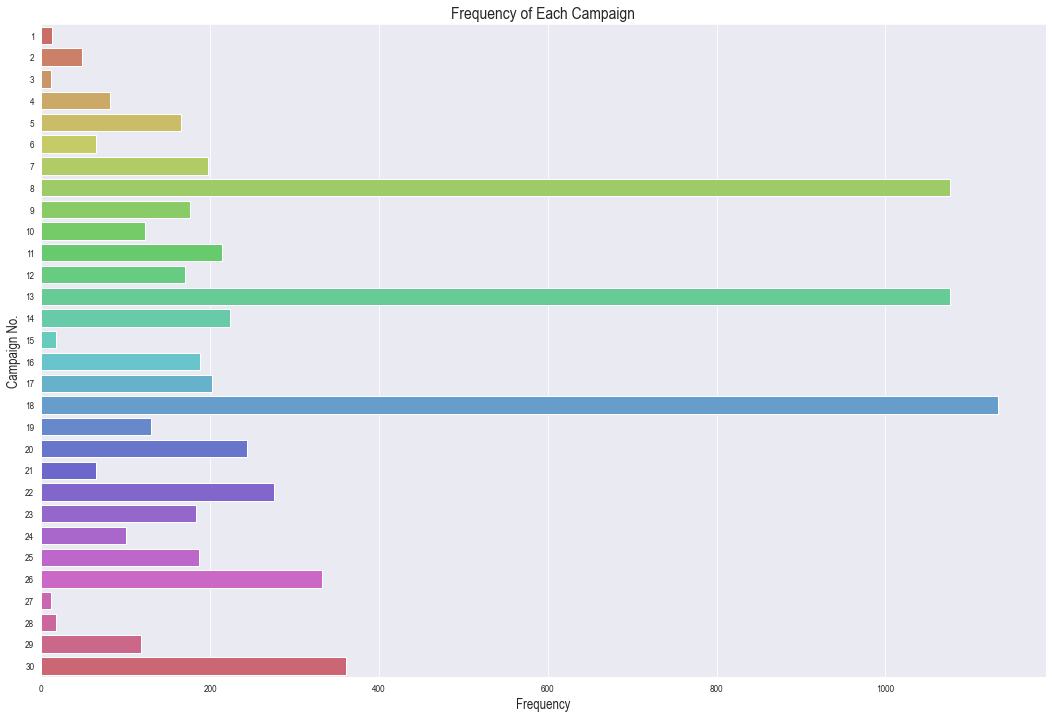

In [116]:
freq_campaigns = pd.DataFrame(list(zip(df_campaign_hh.CAMPAIGN.value_counts().index, 
                                       df_campaign_hh.CAMPAIGN.value_counts())),columns=["Campaign","Frequency"])
fig = plt.figure(figsize=(18,12))
sns.barplot(y="Campaign",x="Frequency",data = freq_campaigns,orient="h", palette = 'hls')
plt.title('Frequency of Each Campaign', fontsize=17)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Campaign No.', fontsize=14)
plt.show()

Campaign number 18, 13 and 8 being the most frequent ones reaching 1000 and more households each 
(no campaigns applied to same customer more than once, therefore Frequency axis gives unique number of households).

This leaves us the hint to investigate, enhance and replicate: Why were this campaigns so succesfull?

## Coupons and Redemptions

### Coupons

In [28]:
df_coupons.head(5)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


This file is a Is a lookup table which lists all the coupons sent to customers as part of a campaign, as well as the products for which each coupon is redeemable

"UPC Coupon Codes were commonly used between 1997-2011 and are still in limited use.  Today the Databar Coupons have supplanted UPC Coupons, however there may be some still in use."

source: https://www.barcode.graphics/education-coupon-formats/

Dataset Quality Check

In [29]:
def EDA(df_coupons):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape (rows, columns):' + '\033[0m')
    print(df_coupons.shape, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Columns :' + '\033[0m')
    print(df_coupons.columns, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatypes & Missing values:' + '\033[0m')
    print(df_coupons.info(), 
          
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df_coupons.columns:
        print('\033[1m' + 'Unique Values in {} :'.format(col) + '\033[0m',len(df_coupons[col].unique()))

    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summarized Statistics :' + '\033[0m')
    print(df_coupons.describe(include='all'), 
          
          '\n------------------------------------------------------------------------------------\n')
    

    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df_coupons.duplicated().sum())
          
EDA(df_coupons)

EXPLORATORY DATA ANALYSIS :

Shape (rows, columns):
(124548, 3) 
------------------------------------------------------------------------------------

Columns :
Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object') 
------------------------------------------------------------------------------------

Datatypes & Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB
None 
------------------------------------------------------------------------------------

Unique Values in COUPON_UPC : 1135
Unique Values in PRODUCT_ID : 44133
Unique Values in CAMPAIGN : 30

------------------------------------------------------------------------------------

Summarized Statistics :
       

Considering a 120k rows dataset, 5k duplicates is not much (less than 5%). 
Nonetheless we would like to know the reason of that:

- Allegedly, its fair to think the data is valid (not duplicated), as there´s no business reason to make distinct coupons-codes for same Products and Campaigns, other than preventing other customers than the intended ones, from using them (why would you prevent someone from purchasing at your store?). 
- This last arguments gains strengh as the table does not include the household_key, lacking of any relation or treacability oh which coupon went to whom. 

### Coupon Redemption

In [30]:
df_coupons_redempt.head(5)

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


Is a data table, ordered by household_key, gives which household redeemed what coupon number.
Also the day of the redeem and the campaign number is given for each household.
How many households redeemed coupons?

Dataset Quality Check

In [31]:
def EDA(df_coupons_redempt):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape (rows, columns):' + '\033[0m')
    print(df_coupons_redempt.shape, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Columns :' + '\033[0m')
    print(df_coupons_redempt.columns, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatypes & Missing values:' + '\033[0m')
    print(df_coupons_redempt.info(), 
          
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df_coupons_redempt.columns:
        print('\033[1m' + 'Unique Values in {} :'.format(col) + '\033[0m',len(df_coupons_redempt[col].unique()))

    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summarized Statistics :' + '\033[0m')
    print(df_coupons_redempt.describe(include='all'), 
          
          '\n------------------------------------------------------------------------------------\n')
    

    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df_coupons_redempt.duplicated().sum())
          
EDA(df_coupons_redempt)

EXPLORATORY DATA ANALYSIS :

Shape (rows, columns):
(2318, 4) 
------------------------------------------------------------------------------------

Columns :
Index(['household_key', 'DAY', 'COUPON_UPC', 'CAMPAIGN'], dtype='object') 
------------------------------------------------------------------------------------

Datatypes & Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  2318 non-null   int64
 1   DAY            2318 non-null   int64
 2   COUPON_UPC     2318 non-null   int64
 3   CAMPAIGN       2318 non-null   int64
dtypes: int64(4)
memory usage: 72.6 KB
None 
------------------------------------------------------------------------------------

Unique Values in household_key : 434
Unique Values in DAY : 328
Unique Values in COUPON_UPC : 556
Unique Values in CAMPAIGN : 30

---------------------------------

In [32]:
print(len(df_coupons_redempt.household_key.unique()) , "households redeemed coupons")

434 households redeemed coupons


### Number of Redeems for each Campaign

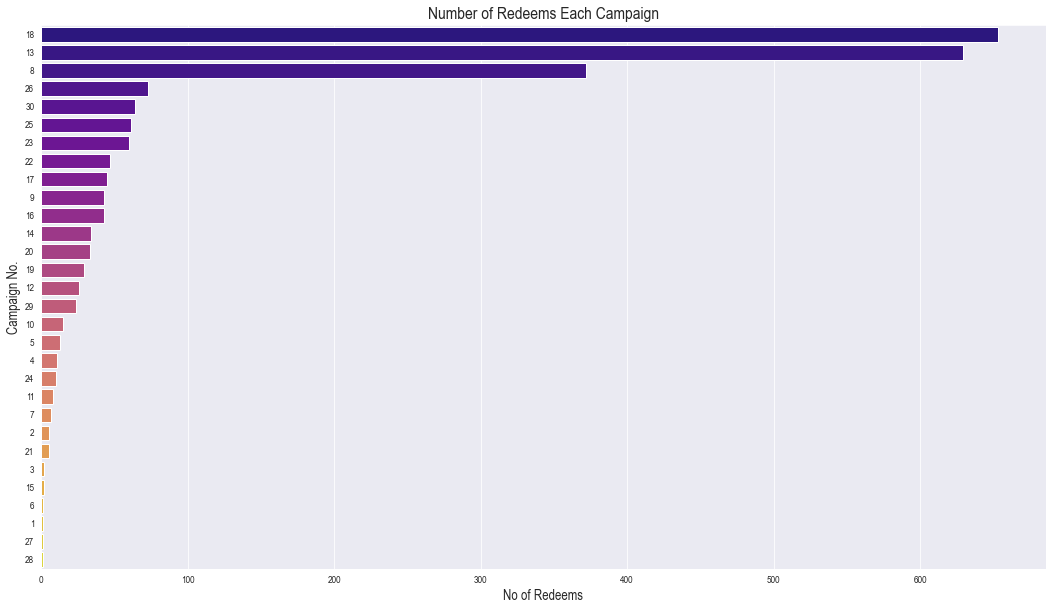

In [114]:
redeem_frequency = pd.DataFrame(list(zip(df_coupons_redempt.CAMPAIGN.value_counts().index, df_coupons_redempt.CAMPAIGN.value_counts())),columns=["Campaign","No of Redeems"])
fig = plt.figure(figsize=(18,10))
sns.barplot(y="Campaign",x="No of Redeems",data = redeem_frequency,orient="h",order=redeem_frequency.Campaign, palette = 'plasma')
plt.title('Number of Redeems Each Campaign', fontsize=17)
plt.xlabel('No of Redeems', fontsize=14)
plt.ylabel('Campaign No.', fontsize=14)
plt.show()

Most frequent campaigns (18, 13 and 8, all belongs to TypeA) attracts the most number of redeems as expected. 

### Redeem Rate Per Campaing


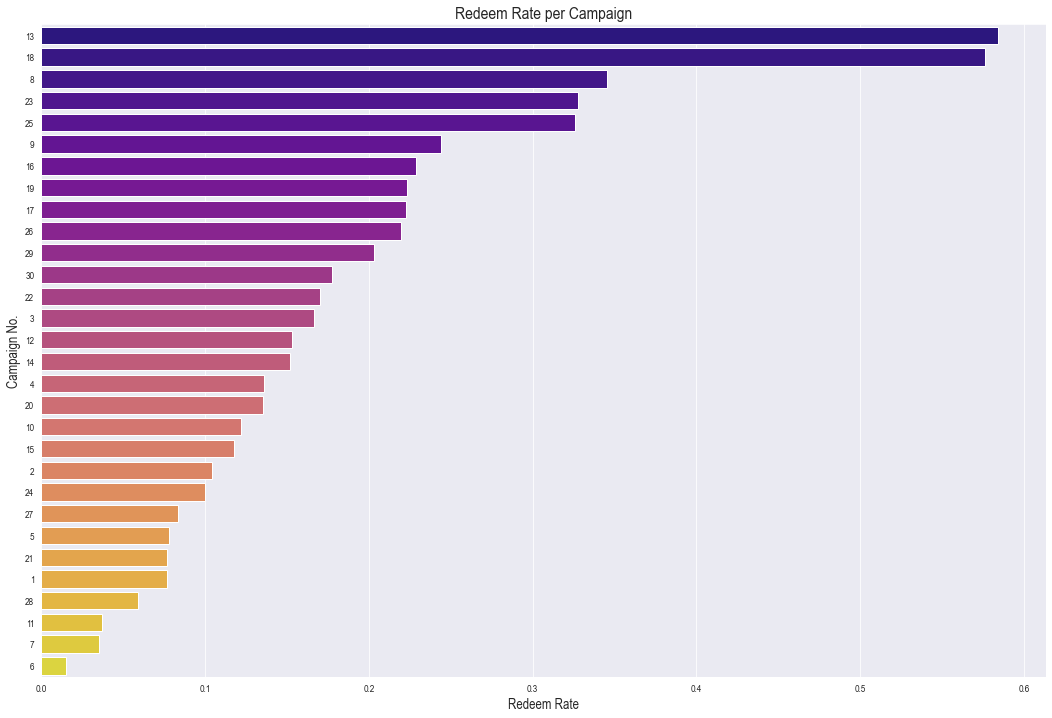

In [113]:
redems_per_camp = df_coupons_redempt.CAMPAIGN.value_counts().sort_values()/df_campaign_hh.CAMPAIGN.value_counts().sort_values()
redems_per_camp = pd.DataFrame(list(zip(redems_per_camp.index,redems_per_camp)),
                               columns=["Campaign","Redeem_Rate"]).sort_values(by="Redeem_Rate",ascending=False)
plt.figure(figsize=(18,12))
sns.barplot(y="Campaign",x="Redeem_Rate",data=redems_per_camp,orient="h",order=redems_per_camp.Campaign, palette = 'plasma')
plt.title('Redeem Rate per Campaign', fontsize=17)
plt.xlabel('Redeem Rate', fontsize=14)
plt.ylabel('Campaign No.', fontsize=14)
plt.show()

Campaign 13 and 18 are clearly have higher redeem rates (~60%) as compared to the rest of campaigns.
Based on these results, campaign organisers did well by promoting the right campaigns (13 and 18) more frequently.

# Churn Prediction

Predicting the percentage of lost customers. A household that stops buying is a Churned customer: that household is surely making it purchases on the competition most of the times. 

Unfortunately, there is not column which indicates if a household has stop purchasing at our store for a given time. This would be our Target variable, the one we are trying to predict to extract more insights on which are the root causes. We will first have to define and operationalize this variable in order to predict it. 

Transactional products, opposite to subscription-based products, dont offer a clear sign of churn, as no service is cancelled nor declared.

Churn Retail Rate:

- Less than 5%: Excellent.
- 5% to 7%: Acceptable.
- 10% or more: Concerning.

Business cant grow with such a high churn volume, even when acquiring new customers. Caring for existing customers is  more profitable than acquiring new ones. It costs five times more to obtain a new customer than it does to retain an existing customer. 
Decreasing  churn rate by five percent increases profits up to 125%.

Let's define transactional churn:

- A customer will be considered as churned if not purchased from a store 2 weeks or more.
- 2 weeks out threshold is chosen as it splits households around 85%/15% No Churn/Churn.

## Target Engineering

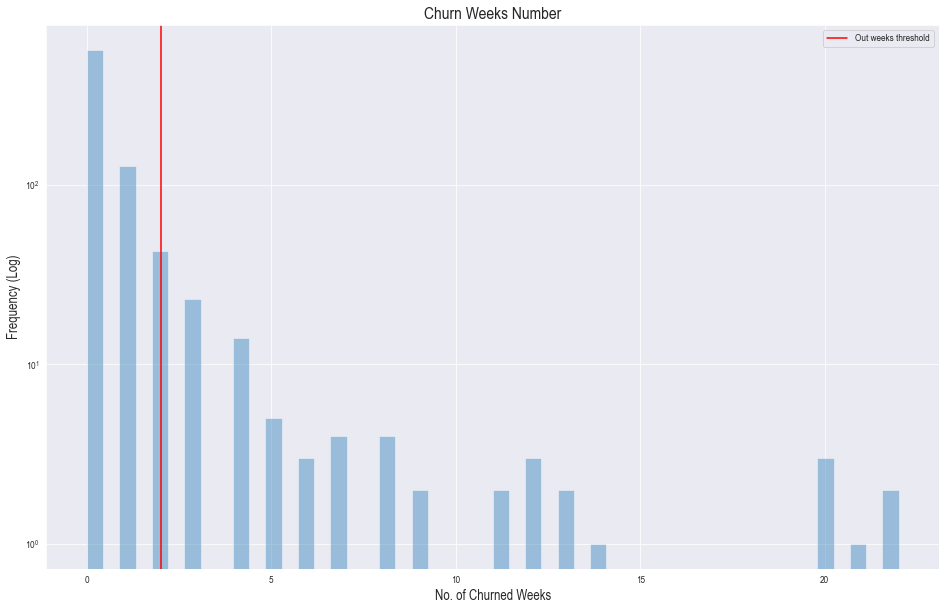

In [35]:
out_weeks_threshold = 2

# weekly customer purchase amount

weekly_purchase = df_transactions.groupby(["household_key","WEEK_NO"]).sum()["SALES_VALUE"]
weekly_purchase = weekly_purchase.unstack()

# customer churned by their last 2 week's purchasing behaviour
#  go through all households and calculate out weeks

target = []
common_houses = set(df_demographics.household_key) & set(df_transactions.household_key)
for house in common_houses:
  target.append(102-weekly_purchase.loc[house].dropna().index[-1])

target = pd.DataFrame(list(zip(common_houses,target)),columns=["household_key","No. of Churned Weeks"])
plt.figure(figsize=(16,10))
ax = sns.distplot(target["No. of Churned Weeks"],kde=False)
ax.axvline(x=out_weeks_threshold,c="red",label="Out weeks threshold")
ax.legend()
ax.set_yscale("log")
ax.set_ylabel("Frequency (Log)", fontsize=14)
ax.set_xlabel("No. of Churned Weeks", fontsize=14)

plt.title('Churn Weeks Number', fontsize=17)
# plt.xlabel('Total Purchases (USD)', fontsize=14)
# plt.ylabel('Household Key', fontsize=14)
plt.show()

### Target Definition

Churned -> True
Not Churned -> False

In [36]:
target["isChurned"] = target["No. of Churned Weeks"]>=out_weeks_threshold
target.drop("No. of Churned Weeks",axis=1,inplace=True)

### Customer clasification

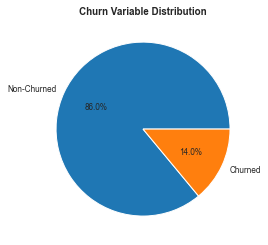

In [37]:
target.isChurned.value_counts().plot(kind="pie",autopct="%.1f%%",labels=["Non-Churned","Churned"])
plt.ylabel("")
plt.title("Churn Variable Distribution",fontweight="bold")
plt.show()

### Optimization

This 14% might indicate they are in deep business continuity trouble. But, what if the 2-week threshold is too tight?
Lets print some products´ information to try guess in what product-area this retail specializes, in order to establish a reasonable period for considering a customer "churned".

Reasoning > different products implie different purchasing frequencies: a household doesnt purchase clothes everyweek, but there are high chances that it does buy food. 

### Business Comprehension. 

In [38]:
df_product.head(5)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


Head shows gastronomy related products. Lets dive deeper with this department presence. 

<AxesSubplot:>

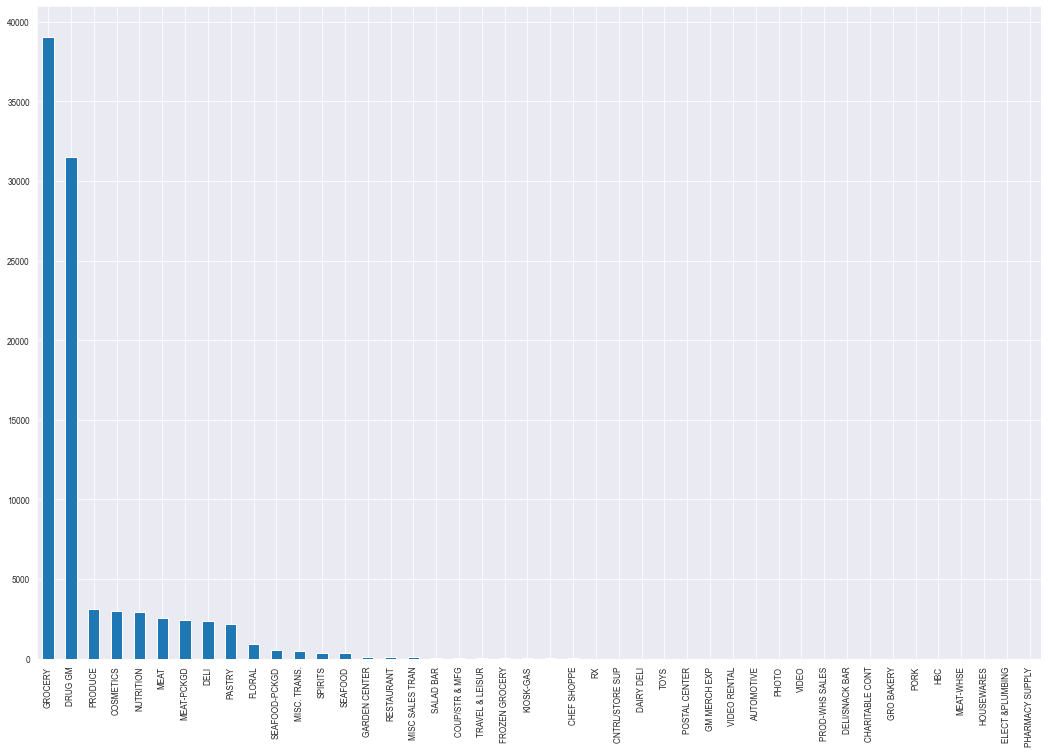

In [112]:
df_product.DEPARTMENT.value_counts().plot(kind="bar",figsize=(18,12))

### Observations

Although there is a broad and diverse separtment catalogue, the predominants are: Grocery, Drug GM, Produce, Nutrition, Meat, Deli & Pastry.
- This Business is probably a big retail shop.
- It may have department clasification defects, where lots of products appear in  "GROCERY", while they could receive a more specific clasification.
- Our 2-Tweek initial threshold was not unreasonable, as it is expected that someone would have a high frequency purchase in this kind of shops. 
- However, lets expand the threshold tolerance to 3 weeks, asuming this specific retail is expensive or top-notch, the kind of shop someone would enter once or twice a month for acquiring special/imported/expensive/high quality products. 

### New Churn Threshold

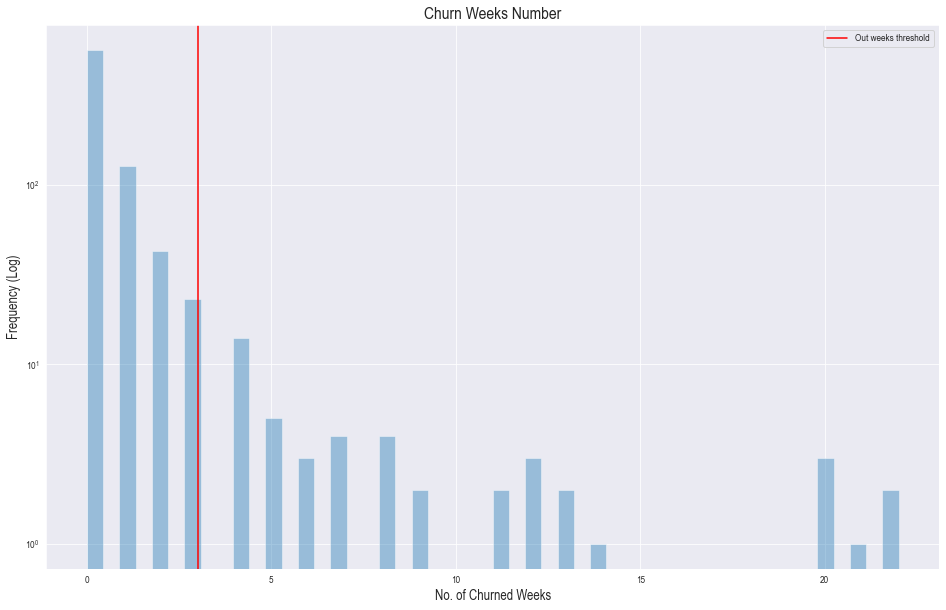

In [110]:
# Lets try our new threshold

churn_threshold = 3

# weekly customer purchase amount

weekly_purchase = df_transactions.groupby(["household_key","WEEK_NO"]).sum()["SALES_VALUE"]
weekly_purchase = weekly_purchase.unstack()

# customer churned by their last 2 week's purchasing behaviour
#  go through all households and calculate out weeks

target = []
common_houses = set(df_demographics.household_key) & set(df_transactions.household_key)
for house in common_houses:
  target.append(102-weekly_purchase.loc[house].dropna().index[-1])

target = pd.DataFrame(list(zip(common_houses,target)),columns=["household_key","No. of Churned Weeks"])
plt.figure(figsize=(16,10))
ax = sns.distplot(target["No. of Churned Weeks"],kde=False)
ax.axvline(x=churn_threshold,c="red",label="Out weeks threshold")
ax.legend()
ax.set_yscale("log")
ax.set_ylabel("Frequency (Log)", fontsize=14)
ax.set_xlabel("No. of Churned Weeks", fontsize=14)

plt.title('Churn Weeks Number', fontsize=17)
# plt.xlabel('Total Purchases (USD)', fontsize=14)
# plt.ylabel('Household Key', fontsize=14)
plt.show()

In [41]:
target["isChurned"] = target["No. of Churned Weeks"]>=churn_threshold
target.drop("No. of Churned Weeks",axis=1,inplace=True)

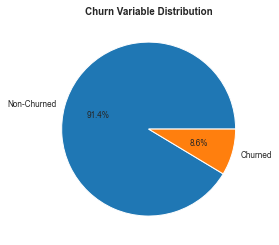

In [42]:
target.isChurned.value_counts().plot(kind="pie",autopct="%.1f%%",labels=["Non-Churned","Churned"])
plt.ylabel("")
plt.title("Churn Variable Distribution",fontweight="bold")
plt.show()

### Updated Churn Percentage

Now we got 8.6% Churned Customers, which is still not derirable, but much better than our previous 14%. Again, these are mere speculations on what we can grasp from the products dataset. Definining a valid and consistent Churn Threshold is a multi stakeholder, data-drive, business model - dependant mission. 

## Feature engineering

From "Campaign Table", "Transaction Data" and "Coupon Redempt" tables we are pulling and modelling data, in order to build features, that will be key for predicting Churn (Target). 

### Feature 1: List of campaigns received by each household

In [43]:
household_per_campaign = df_campaign_hh.groupby("CAMPAIGN")["household_key"].apply(list)
total_campaigns = len(df_campaign_hh.CAMPAIGN.unique())
df_camp = pd.DataFrame(np.full((total_households,total_campaigns),0),columns=["Camp_"+str(i) for i in range(1,total_campaigns+1)],
                                                                                                           index=range(1,total_households+1))
for camp in household_per_campaign.index:
    df_camp.loc[household_per_campaign[camp],"Camp_"+str(camp)] = 1

df_camp["household_key"] = df_camp.index

### Feature 2: Total number of received campaigns per household

In [44]:
temp = df_campaign_hh.household_key.value_counts().sort_index()
no_of_received_campaigns = pd.DataFrame(list(zip(temp.index,temp.values.astype(int))),columns=["household_key","no_of_received_campaigns"])

Number of campaigns received vs household's purchase behaviour.

The correlation between the number of campaigns received by a household and their total purchase amount is visualised in a scatter plot below. Linear line in the graph shows the regression model fitted to the scattered data. One can say the aforementioned variables are linearly related.

<Figure size 1152x576 with 0 Axes>

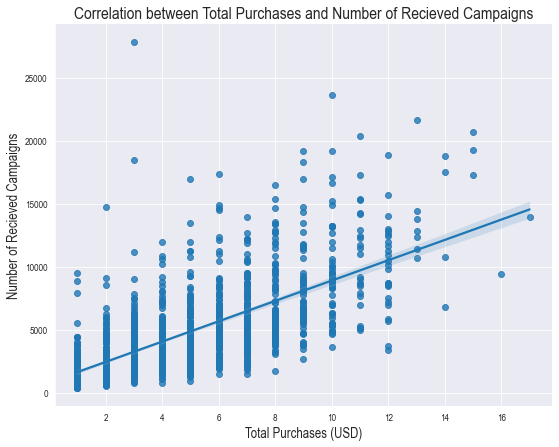

In [108]:
plt.figure(figsize=(16,8))

no_of_received_campaigns_vs_sumsales = pd.merge(no_of_received_campaigns,purc_per_cust,on="household_key")
sns.lmplot(x="no_of_received_campaigns",y="Total Purchase (USD)",data=no_of_received_campaigns_vs_sumsales,
                                                                                                          size=6, aspect=1.3, palette = 'plasma')
plt.title('Correlation between Total Purchases and Number of Recieved Campaigns', fontsize=17)
plt.xlabel('Total Purchases (USD)', fontsize=14)
plt.ylabel('Number of Recieved Campaigns', fontsize=14)
plt.show()

In [46]:
no_of_received_campaigns_vs_sumsales.drop("household_key",axis=1).corr()

,no_of_received_campaigns,Total Purchase (USD)
no_of_received_campaigns,1.000000,0.704409
Total Purchase (USD),0.704409,1.000000


The scatter plot and the correlation value above (70%) indicates that the total purchase amount of a household is positively correlated to the number of campaigns received by them.

### Feature 3: List of campaigns resulted in coupon redemption

In [47]:
temp = df_coupons_redempt.groupby("household_key")["CAMPAIGN"].apply(list)
rede_camp_history_per_household = pd.DataFrame(list(zip(temp.index,temp.values)),columns=["household_key","redeemed_CAMPAIGN_list"])

### Feature 4: Number of redemptions made by each household

In [48]:
temp = df_coupons_redempt.household_key.value_counts().sort_index()
no_of_rede_per_household = pd.DataFrame(list(zip(temp.index,temp.values.astype(int))),columns=["household_key","no_of_redeems"])

### Feature 5: Most Frequent Campaign Type (A,B,C) received by each household

In [49]:
camp_list = df_campaign_hh.groupby("household_key")["DESCRIPTION"].apply(list)
most_freq_type = pd.DataFrame(list(zip(camp_list.index,[pd.Series(i).value_counts().idxmax() for i in camp_list])),columns=["household_key","most_freq_camp_type"])

### Feature 6: Top 20 stores with high number of households which have more high out weeks

In [50]:
store_per_house = df_transactions.groupby("household_key")["STORE_ID"].apply(list).apply(np.unique)

churn_houses = set(target.household_key[target.isChurned == True].sort_values().values) & set(df_demographics.household_key.unique())
churn_stores = []
for i in churn_houses:
  churn_stores.extend(store_per_house[i])

churn_stores = pd.Series(churn_stores).value_counts()/len(churn_houses)

df_store = df_transactions.groupby(["STORE_ID","household_key"]).count()["BASKET_ID"].unstack("STORE_ID")
df_store.replace(np.nan,0,inplace=True)
df_store[df_store>0] = 1

#select the top stores with high number of churners
df_store = df_store.loc[:,churn_stores.index[:20]]
df_store.columns=["Store_"+str(i) for i in df_store.columns]

### Feature 7: Amount of purchase of a household within two years

In [51]:
purc_per_cust = df_transactions.groupby("household_key").sum()["SALES_VALUE"].sort_values(ascending=False)
purc_per_cust = pd.DataFrame(list(zip(purc_per_cust.index,purc_per_cust)),columns=["household_key","Total Purchase (USD)"])

# Final Dataset Building

Prepairing the final dataframe, which includes our features and target variables, besides key demographics of the clients. On this dataset we will perform further exploratory analysis to pull insights from churn, and then we will train and run our prediction model. 

In [52]:
# Step to step building final df_finalframe which previous developed features:

df_final = pd.merge(df_demographics,df_camp,on="household_key",how="left")                 # Feature 1
df_final = pd.merge(df_final,no_of_received_campaigns,on="household_key",how="left")           # Feature 2
df_final = pd.merge(df_final,df_store,on="household_key",how="left")                           # Feature 6
df_final = pd.merge(df_final,no_of_rede_per_household,on="household_key",how="left")           # Feature 4
df_final = pd.merge(df_final,most_freq_type,on="household_key",how="left")                     # Feature 5
df_final = pd.merge(df_final,purc_per_cust,on="household_key",how="left")                      # Feature 7
df_final = pd.merge(df_final,target,on="household_key",how="left")                             # Target 

In [53]:
df_final.shape

(801, 63)

In [54]:
df_final.head(5)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Camp_1,Camp_2,...,Store_450,Store_433,Store_361,Store_295,Store_320,Store_346,no_of_redeems,most_freq_camp_type,Total Purchase (USD),isChurned
0,65+,CommonLaw,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,TypeB,4330.16,False
1,45-54,CommonLaw,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,TypeB,3400.05,False
2,25-34,Unmarried,25-34K,Unknown,2 Adults Kids,3,1,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeB,5534.97,False
3,25-34,Unmarried,75-99K,Homeowner,2 Adults Kids,4,2,13,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,TypeB,13190.92,False
4,45-54,RegisteredPartner,50-74K,Homeowner,Single Female,1,None/Unknown,16,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,TypeA,1512.02,True


We still need to performe data engineering for attaining an apropiate dataframe. Change NaN or None/Unknown values to zero for the columns of "number of received campaigns", "kid category" and the "number of redeems"

In [55]:
df_final.no_of_received_campaigns.replace(np.nan,0,inplace=True)
df_final.no_of_received_campaigns = df_final.no_of_received_campaigns.astype(int)
df_final.no_of_redeems.replace(np.nan,0,inplace=True)

Also, change other object type elements in the columns to integer for modeling purpose.

In [56]:
df_final.KID_CATEGORY_DESC.replace(["None/Unknown","3+"],[0,3],inplace=True)
df_final.KID_CATEGORY_DESC = df_final.KID_CATEGORY_DESC.astype(int)
df_final.HOUSEHOLD_SIZE_DESC.replace("5+",5,inplace=True)
df_final.HOUSEHOLD_SIZE_DESC = df_final.HOUSEHOLD_SIZE_DESC.astype(int)
df_final["Total Purchase (USD)"] = df_final["Total Purchase (USD)"].astype(int)

In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGE_DESC                  801 non-null    object 
 1   MARITAL_STATUS_CODE       801 non-null    object 
 2   INCOME_DESC               801 non-null    object 
 3   HOMEOWNER_DESC            801 non-null    object 
 4   HH_COMP_DESC              801 non-null    object 
 5   HOUSEHOLD_SIZE_DESC       801 non-null    int32  
 6   KID_CATEGORY_DESC         801 non-null    int32  
 7   household_key             801 non-null    int64  
 8   Camp_1                    801 non-null    int32  
 9   Camp_2                    801 non-null    int32  
 10  Camp_3                    801 non-null    int32  
 11  Camp_4                    801 non-null    int32  
 12  Camp_5                    801 non-null    int32  
 13  Camp_6                    801 non-null    int32  
 14  Camp_7    

'Household_key' is the ID of a household and has served as a Primary Ke.
It will not be used in the modelling. The rest of the data will be used.

In [58]:
df_final.dtypes.value_counts()

int32      34
float64    21
object      6
int64       1
bool        1
dtype: int64

# Multivariate EDA

Now we are able to pull correlations from all the variables and the churn effect. 
Let's see how our features interact with the target variable

## Age

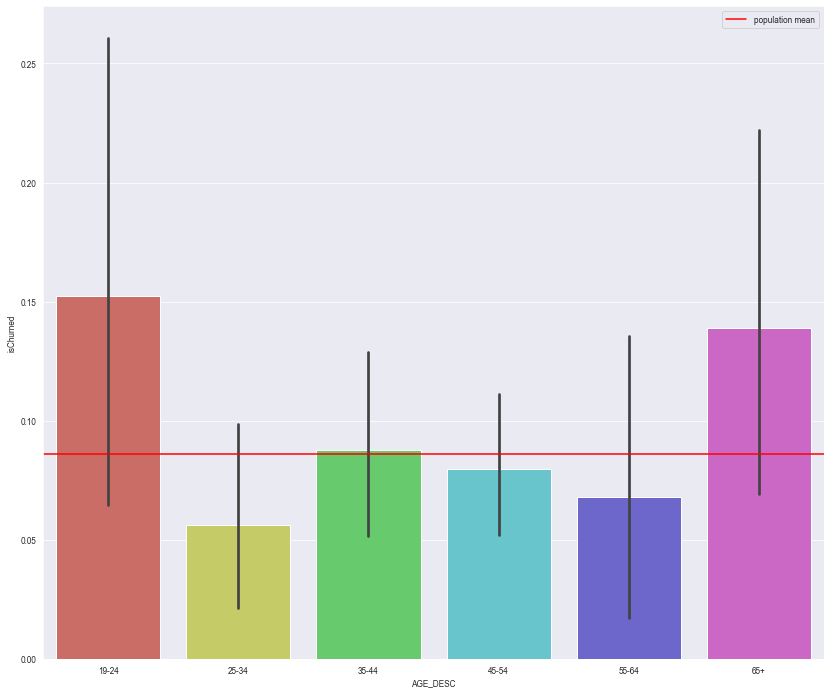

In [94]:
ax = sns.barplot(x="AGE_DESC",y="isChurned",data=df_final,order=["19-24","25-34","35-44","45-54","55-64","65+"], palette = 'hls')
ax.axhline(y=df_final.isChurned.sum()/len(df_final),c="red",label="population mean")
ax.legend()
ax.figure.set_size_inches(14,12)
plt.show()

Households with the age 25-34 and 55-64 tend to churn less then the rest of other segments.
No monotonic increase or decrease observed with age.

## Marital Status

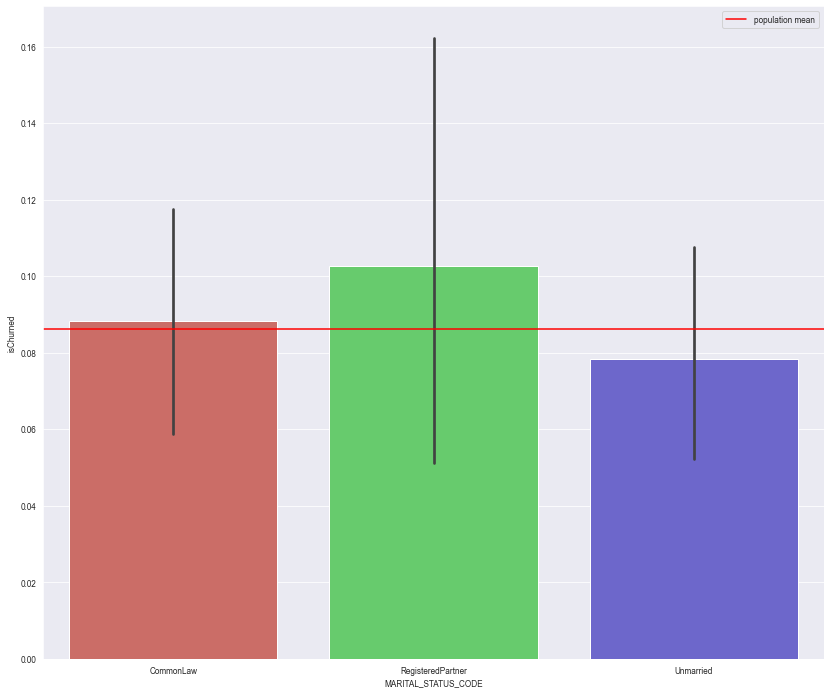

In [95]:
ax = sns.barplot(x="MARITAL_STATUS_CODE",y="isChurned",data=df_final,order=["CommonLaw","RegisteredPartner","Unmarried"], palette = 'hls')
ax.axhline(y=df_final.isChurned.sum()/len(df_final),c="red",label="population mean")
ax.legend()
ax.figure.set_size_inches(14,12)
plt.show()

Unmarried tend to Churn Less than Married (Registered Partner) and Common Law

## Income

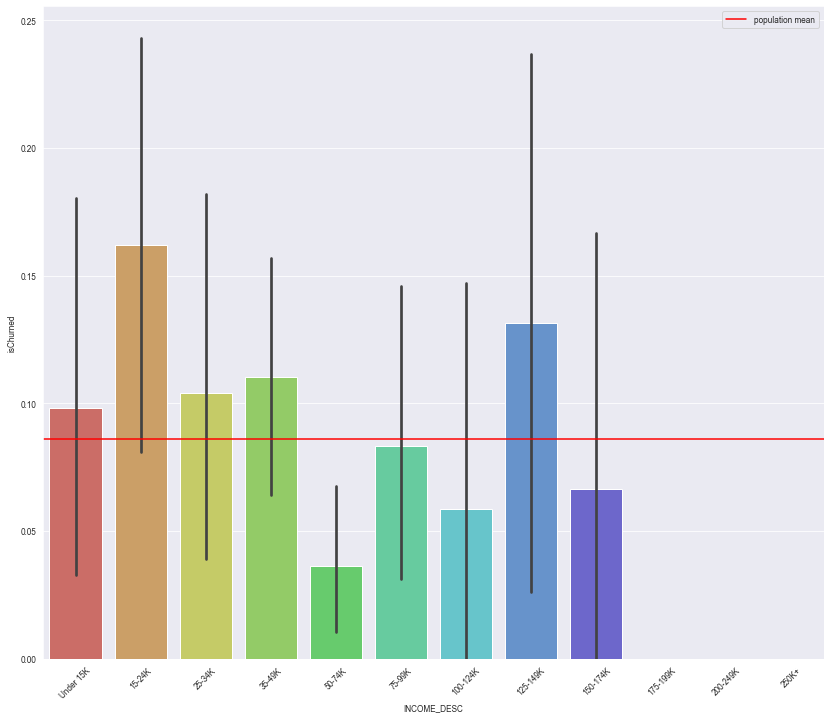

In [96]:
fig = plt.figure(figsize=(8,5))
ax = sns.barplot(x="INCOME_DESC",y="isChurned",data=df_final,
                 order=["Under 15K","15-24K","25-34K","35-49K","50-74K","75-99K","100-124K","125-149K","150-174K","175-199K","200-249K","250K+"], palette = 'hls')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.axhline(y=df_final.isChurned.sum()/len(df_final),c="red",label="population mean")
ax.legend()
ax.figure.set_size_inches(14,12)
plt.show()

Not possible to define a simple trend, because there are both low and high churning rates for both low and high incomes. We need more information about this specific business model to draw more conclusions. 

## Home Ownership

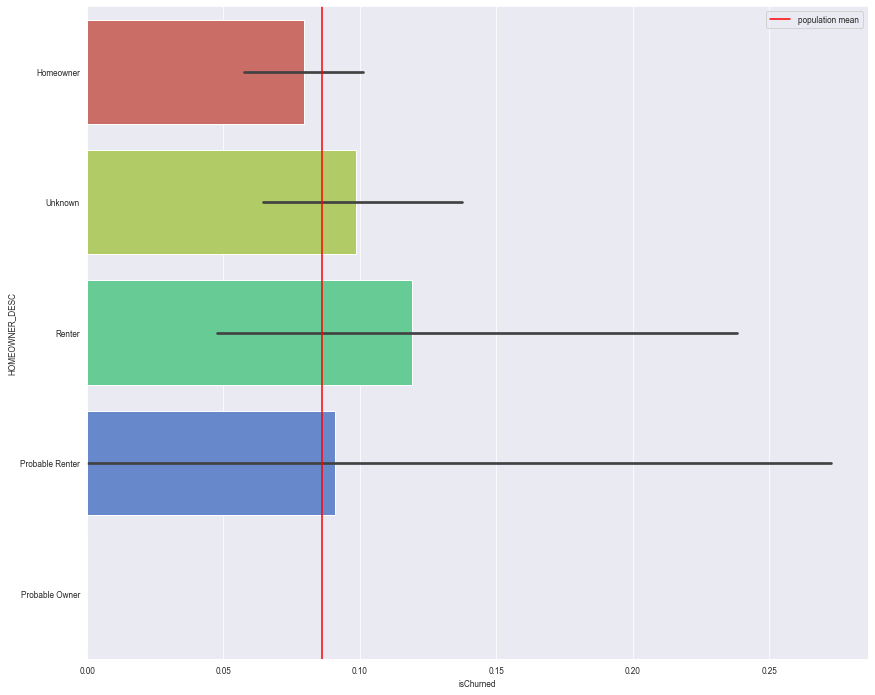

In [97]:
ax = sns.barplot(y="HOMEOWNER_DESC",x="isChurned",data=df_final,orient="h",palette = 'hls')
ax.axvline(x=df_final.isChurned.sum()/len(df_final),c="red",label="population mean")
ax.legend()
ax.figure.set_size_inches(14,12)
plt.show()

Renters Churn More, but lets see why theres no appearence of Probable Owners.

In [63]:
df_final.HOMEOWNER_DESC.value_counts()

Homeowner          504
Unknown            233
Renter              42
Probable Renter     11
Probable Owner      11
Name: HOMEOWNER_DESC, dtype: int64

Its feasable than within the small population of probable owners, none were clasified as churned. 

## Redeem Rates

Lets group our data based on household's number of redeems. We will use pandas.cut, which groups the number of redeems into the bins. 
Graph below separates "0 redeemers", "redeemed once" and the final group "redeemed more than once":

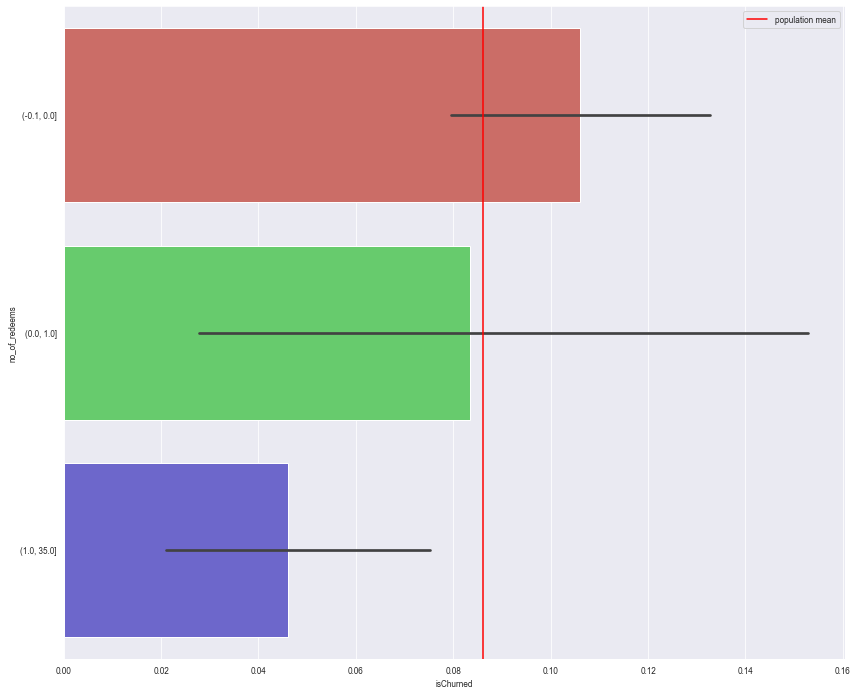

In [98]:
ax = sns.barplot(y=pd.cut(df_final.no_of_redeems,bins=[-0.1,0,1,35],duplicates="drop"),x="isChurned",data=df_final,orient="h", palette = 'hls')
ax.axvline(x=df_final.isChurned.sum()/len(df_final),c="red",label="population mean")
ax.legend()
ax.figure.set_size_inches(14,12)
plt.show()

More Redeem = Less Churn

## Number of Campaigns Received

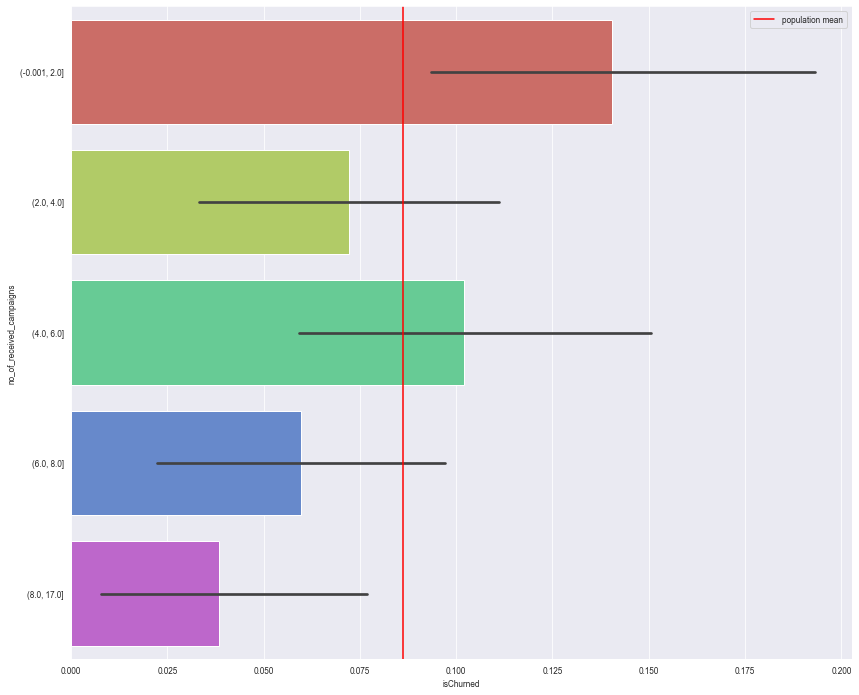

In [99]:
ax = sns.barplot(y=pd.qcut(df_final.no_of_received_campaigns,5,duplicates="drop"),x="isChurned",data=df_final,orient="h", palette = 'hls')
ax.axvline(x=df_final.isChurned.sum()/len(df_final),c="red",label="population mean")
ax.legend()
ax.figure.set_size_inches(14,12)
plt.show()

Less Campaigns Received = More Churn

## Children

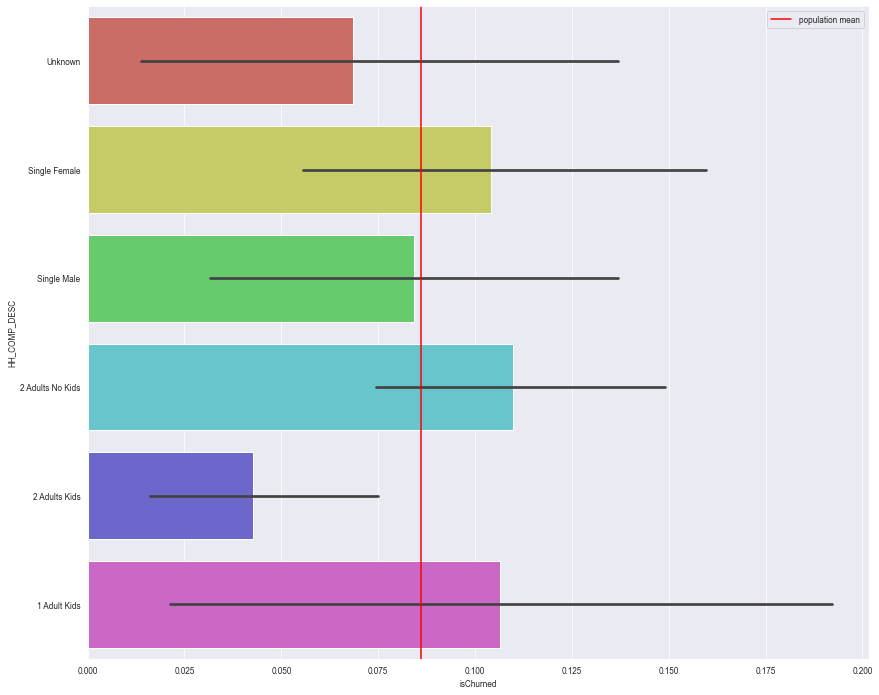

In [100]:
ax = sns.barplot(y="HH_COMP_DESC",x="isChurned",data=df_final,orient="h",order=['Unknown','Single Female','Single Male','2 Adults No Kids','2 Adults Kids','1 Adult Kids'], palette = 'hls')
ax.axvline(x=df_final.isChurned.sum()/len(df_final),c="red",label="population mean")
ax.legend()
ax.figure.set_size_inches(14,12)
plt.show()

Two adults with kids seems to be the most loyal customer segment. 

## Household Size

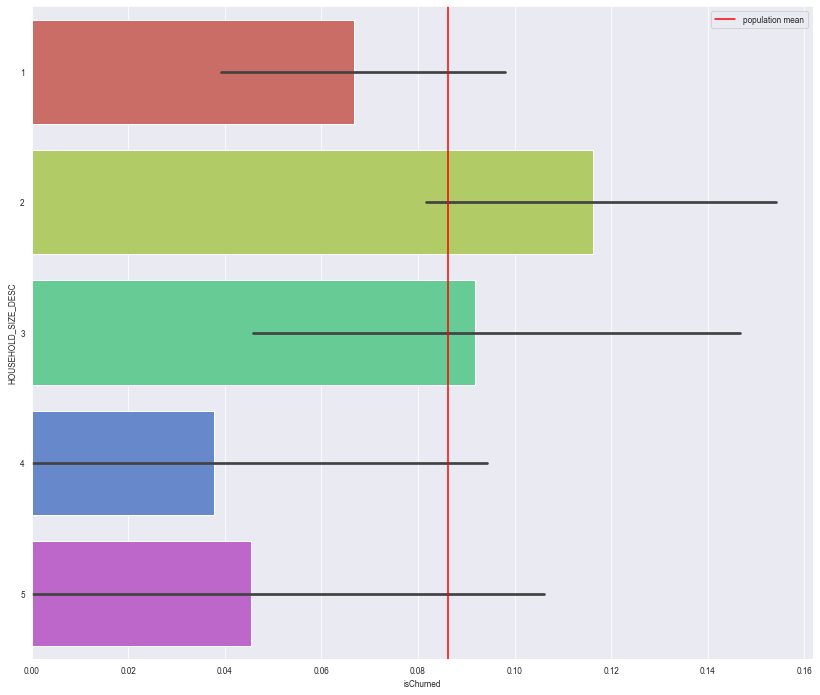

In [101]:
ax = sns.barplot(y="HOUSEHOLD_SIZE_DESC",x="isChurned",data=df_final,orient="h", palette = 'hls')
ax.axvline(x=df_final.isChurned.sum()/len(df_final),c="red",label="population mean")
ax.legend()
ax.figure.set_size_inches(14,12)
plt.show()

Bigger household size = Less Churn

## Campaign Type

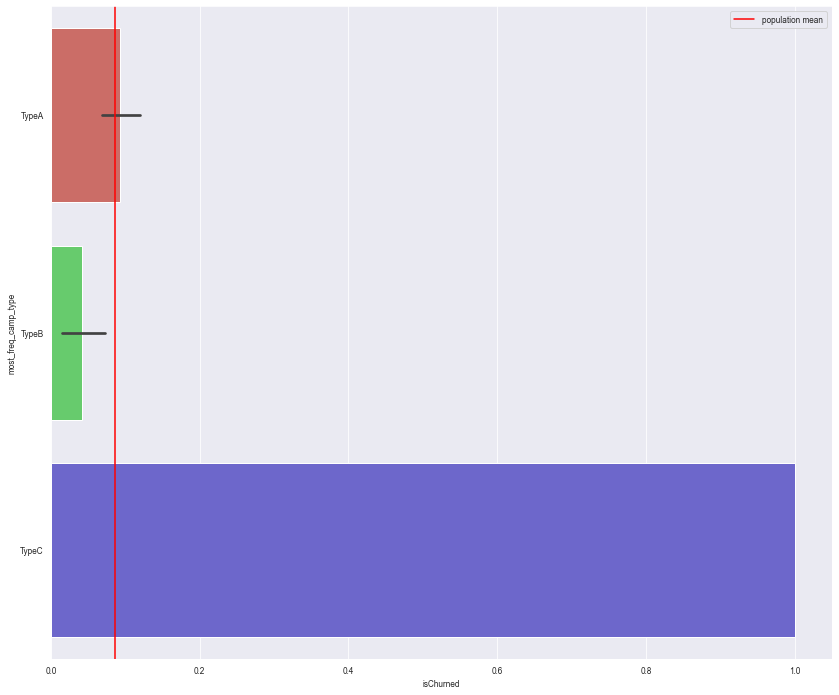

In [102]:
ax = sns.barplot(y="most_freq_camp_type",x="isChurned",data=df_final,orient="h",order=['TypeA','TypeB','TypeC'], palette = 'hls')
ax.axvline(x=df_final.isChurned.sum()/len(df_final),c="red",label="population mean")
ax.legend()
ax.figure.set_size_inches(14,12)
plt.show()

Lets print the proportions of sample size to understand better the results.

In [69]:
df_final.most_freq_camp_type.value_counts()

TypeA    567
TypeB    192
TypeC      1
Name: most_freq_camp_type, dtype: int64

As it only represents the 1% (and we now that customer churned, however its impossible to establish causality), lets leave it out and print again

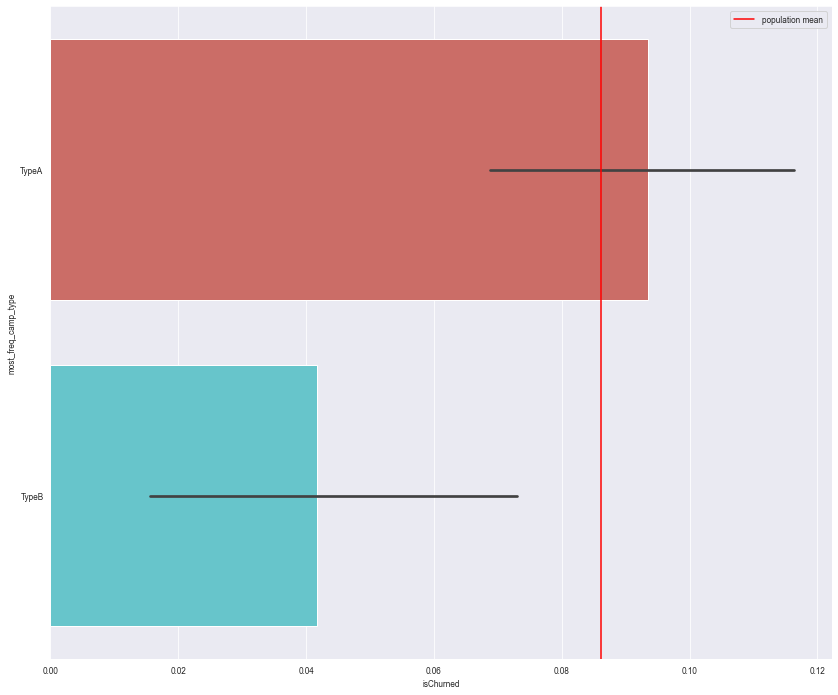

In [103]:
ax = sns.barplot(y="most_freq_camp_type",x="isChurned",data=df_final,orient="h",order=['TypeA','TypeB'], palette = 'hls')
ax.axvline(x=df_final.isChurned.sum()/len(df_final),c="red",label="population mean")
ax.legend()
ax.figure.set_size_inches(14,12)
plt.show()

Again it is important to take into consideration the sample size. But with the population mean in the equation, we can determine that Type B is a more succesfull Campaing: the households that received this campaign churned less. 

## Household Total Purchase

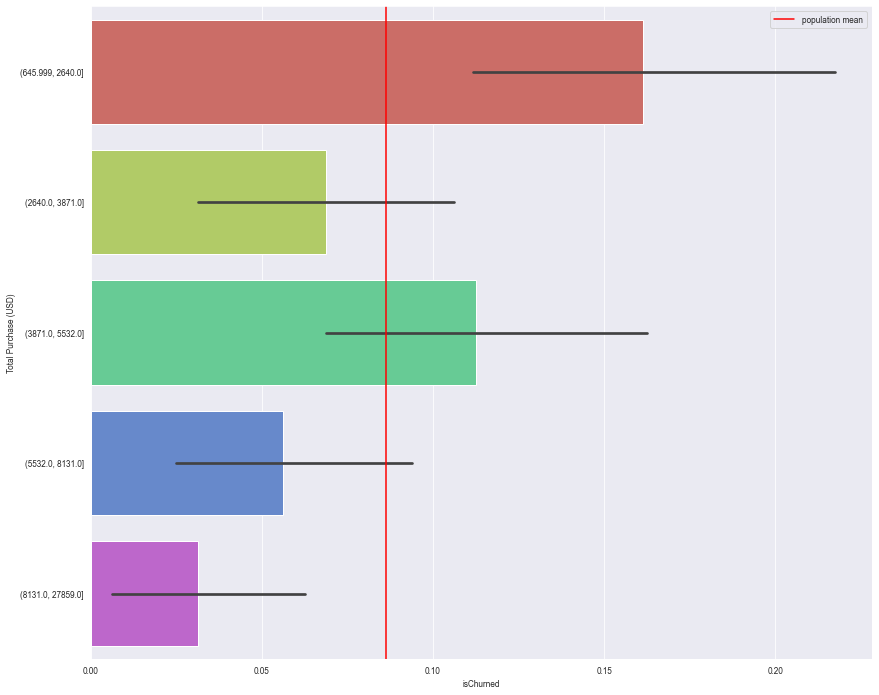

In [104]:
ax = sns.barplot(y=pd.qcut(df_final["Total Purchase (USD)"],5,duplicates="drop"),x="isChurned",data=df_final,orient="h", palette = 'hls')
ax.axvline(x=df_final.isChurned.sum()/len(df_final),c="red",label="population mean")
ax.legend()
ax.figure.set_size_inches(14,12)
plt.show()

Expends More = Churns Less

Total purchase amount of a customer is a clear separator, expected to perform well as a feature in the churn prediction model.
Churn rate decreases as total amount of purchase of a household (within 2 years) increases.

## Campaign Number

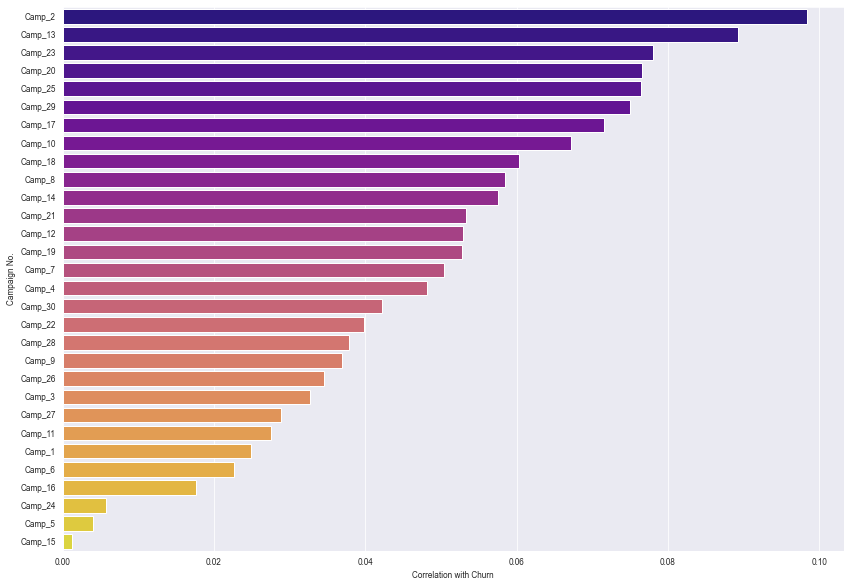

In [106]:
corrs = abs(df_final[["Camp_"+str(i) if i<31 else "isChurned" for i in range(1,32)]].corr()["isChurned"])
corrs.drop("isChurned",inplace=True)
corrs = pd.DataFrame(list(zip(corrs.index,corrs)),columns=["Campaign No.","Correlation with Churn"]).sort_values(by="Correlation with Churn",ascending=False)
fig_store = plt.figure(figsize=(14,10))
sns.barplot(y="Campaign No.",x="Correlation with Churn",data = corrs,orient="h", palette = 'plasma')
plt.show()

In descending order, these are the Campaigns which have more correlation to Churning. We can then use them as feature variables expected to cause a negative influence (churn) in the prediction model. 

## Stores

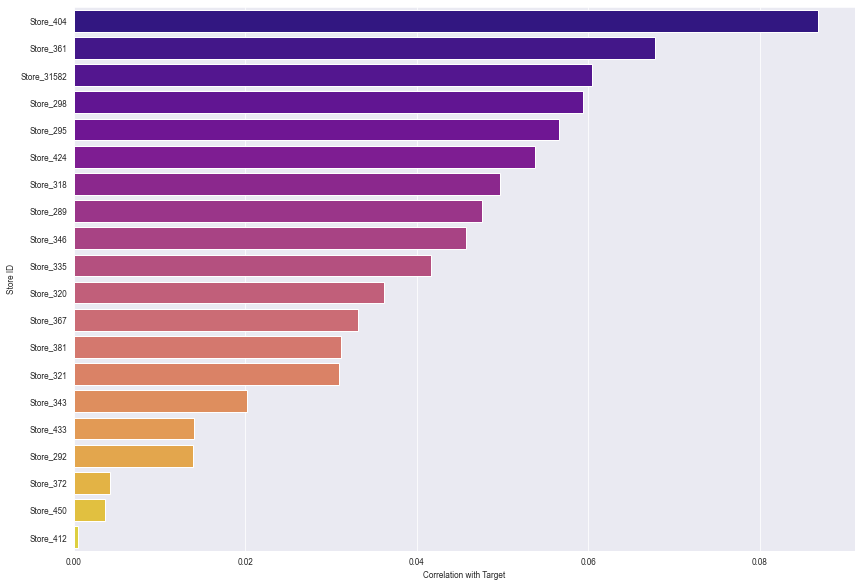

In [107]:
cols =list(df_store.columns)
cols.extend(["isChurned"])
corrs = abs(df_final[cols].corr()["isChurned"])
corrs.drop("isChurned",inplace=True)
corrs = pd.DataFrame(list(zip(corrs.index,corrs)),columns=["Store ID","Correlation with Target"]).sort_values(by="Correlation with Target",ascending=False)
fig_store = plt.figure(figsize=(14,10))
sns.barplot(y="Store ID",x="Correlation with Target",data = corrs,orient="h", palette = 'plasma')
plt.show()

Stores with high number of churned customers in descending order. 